# 10.01 - Fundamentos de Datetime en Pandas

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 35 min

---

## ¿Qué aprenderemos?

- El objeto `Timestamp` y `DatetimeIndex`
- Conversión de datos a fecha con `pd.to_datetime`
- Acceso a propiedades temporales (año, mes, día de la semana)
- Filtrado basado en tiempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

---

## 1. Conversión a Datetime

Pandas es extremadamente potente para parsear fechas automáticamente.

In [2]:
dates = ['2023-01-01', '2023-02-15', 'March 10, 2023', '2023-04-20 14:30:00']
dt_series = pd.to_datetime(dates, format='mixed')

print("Fechas convertidas:")
print(dt_series)

Fechas convertidas:
DatetimeIndex(['2023-01-01 00:00:00', '2023-02-15 00:00:00',
               '2023-03-10 00:00:00', '2023-04-20 14:30:00'],
              dtype='datetime64[ns]', freq=None)


---

## 2. El Accessor `.dt`

Al igual que `.str` para texto, `.dt` nos permite extraer información de las fechas.

In [3]:
df = pd.DataFrame({'timestamp': pd.date_range(start='2024-01-01', periods=10, freq='D')})
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_name'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['timestamp'].dt.dayofweek >= 5

df.head()

,timestamp,year,month,day_name,is_weekend
0,2024-01-01,2024,1,Monday,False
1,2024-01-02,2024,1,Tuesday,False
2,2024-01-03,2024,1,Wednesday,False
3,2024-01-04,2024,1,Thursday,False
4,2024-01-05,2024,1,Friday,False


---

## 3. Ejemplo Práctico: Análisis de Demanda

Simularemos datos de uso de bicis por hora.

In [4]:
np.random.seed(42)
range_hours = pd.date_range(start='2024-01-01', end='2024-01-07', freq='h')
demand = np.random.randint(5, 50, size=len(range_hours))

df_demand = pd.DataFrame({'time': range_hours, 'rentals': demand})
df_demand.head()

,time,rentals
0,2024-01-01 00:00:00,43
1,2024-01-01 01:00:00,33
2,2024-01-01 02:00:00,19
3,2024-01-01 03:00:00,47
4,2024-01-01 04:00:00,12


Visualicemos la demanda promedio por hora del día.

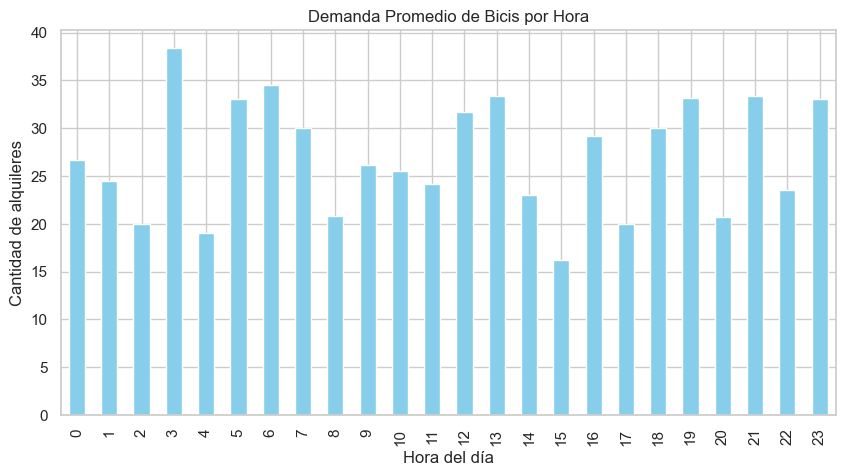

In [5]:
df_demand['hour'] = df_demand['time'].dt.hour
hourly_avg = df_demand.groupby('hour')['rentals'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Demanda Promedio de Bicis por Hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de alquileres')
plt.show()

---

## Resumen

- Usa `pd.to_datetime()` para limpiar columnas de fecha.
- El accessor `.dt` es fundamental para ingeniería de características temporales.
- `pd.date_range()` es ideal para generar series temporales de prueba o rellenar huecos.

---

**Anterior:** [09.03 - Clasificacion](../09_machine_learning/09_03_classification.ipynb)  
**Siguiente:** [10.02 - Resampling y Rolling](./10_02_resampling_rolling.ipynb)